### A Machine Learning Model based on Classifiacation Algorithms for a Bank to help them predict the likelihood of a liability bank customer buying Personal Loans
##### Context 
The bank has a growing customer base. The bank wants to increase borrowers (asset customers)
base to bring in more loan business and earn more through the interest on
loans. So, the bank wants to convert the liability based customers to personal loan
customers. (while retaining them as depositors). 
A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. 
The department wants us to build a model that will help them identify the potential
customers who have a higher probability of purchasing the loan. This will increase the
success ratio while at the same time reduce the cost of the campaign

#### Steps and tasks:
1. Import the datasets and libraries, check datatype, statistical summary, shape, null values etc
2. Check if you need to clean the data for any of the variables
3. EDA: Study the data distribution in each attribute and target variable, share your findings.   
  *  Number of unique in each column?
  *  Number of people with zero mortgage?
  *  Number of people with zero credit card spending per month?
  *  Value counts of all categorical columns
  *  Univariate and Bivariate analysis
   
4. Apply necessary transformations for the feature variables
5. Normalise your data and split the data into training and test set in the ratio of 70:30 respectively
6. Use the Logistic Regression model to predict the likelihood of a customer buying personal loans.
7. Print all the metrics related for evaluating the model performance
8. Build various other classification algorithms and compare their performance
9. Give a business understanding of your model

#### 1) Importing the required libraries and Data set, and Check for statistical summary and Null values in Data 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx','Data')

In [3]:
data.shape

(5000, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
data.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [7]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


Found negative values in Experience attribute

#### There are total 14 attributes in the dataset,
According to the context of the given problem statement,
the Target (or dependent) attribute is "Personal Loan" whereas the remaining are independent attributes.

Attribute Information:

* ID : Customer ID
* Age : Customer's age in completed years
* Experience : years of professional experience
* Income : Annual income of the customer
* ZIP Code : Home Address ZIP code
* Family : Family size of the customer
* CCAvg : Avg. spending on credit cards per month
* Education : Education Level; 1= Undergrad; 2= Graduate; 3= Advanced/Professional
* Mortgage : Value of house mortgage if any
* Securities Account : Does the customer have a securities account with the bank?
* CD Account : Does the customer have a certificate of deposit (CD) account with the bank?
* Online : Does the customer use internet banking facilities?
* Credit card : Does the customer use a credit card issued by UniversalBank?
* Personal Loan : Did this customer accept the personal loan offered in the last campaign? (Target    Attribute)

##### Interval variables are:
   * Age
   * Experience
   * Income
   * CCAvg
   * Mortage
##### Ordinal Categorical Variables are:
   * Family
   * Education
   * Securities Account
   * CD Account 
   * Online 
   * CreditCard
##### The nominal variable is :
   * ID
   * Zip Code

###### checking for any null values

In [8]:
data.isnull().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

No Null values found

## 2) Data Cleaning 

In [9]:
# dropping duplicate values 
data.drop_duplicates(inplace = True)

In [10]:
# checking total number of negative values in Age and Experience attributes
print(data[data['Age']<0].Age.count())
print(data[data['Experience']<0].Experience.count())

0
52


Found 52 negative values in the Experience attribute

In [11]:
# Lets check for correlation among the Atributes
data.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024672,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052030,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050089,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645993,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004068,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109285,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024672,-0.052030,-0.050089,0.645993,-0.004068,-0.109285,1.000000,-0.136138,0.109909,0.366891,0.015087,0.136537,-0.003620,-0.006686
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136138,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109909,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366891,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


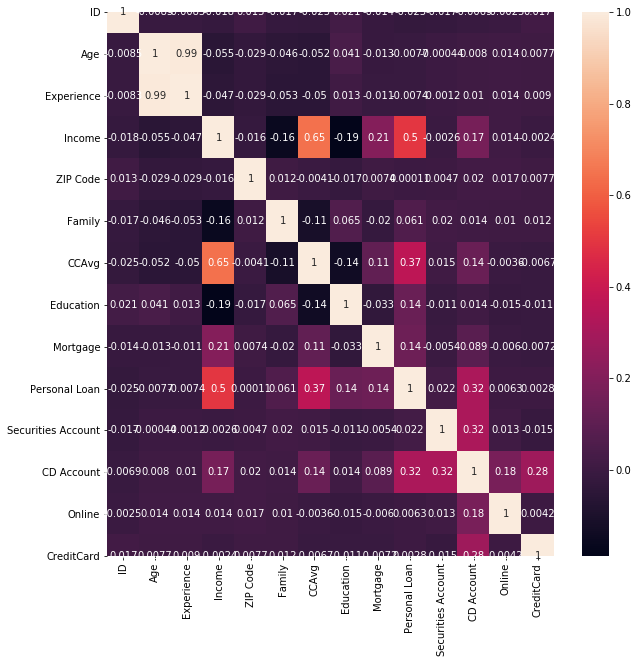

In [12]:
# Visualizing the above correlation data using heatmap 
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot = True)

##### As seen from correlation output ,                                                                                                                              
 * Age and Experience are highly correlated, hence we can drop the Experience column 
 * Income and CCAvg are moderately related 

##### The column attribute "ID" and "ZIP Code" doesn't provide any significant information                                     about a customer buying a personal loan, hence we will drop that too

In [13]:
# dropping the Attributes ID, Experience and ZIP Code
data.drop(['ID','Experience','ZIP Code'],axis=1,inplace=True)
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


#### lets visualize the correlation between all of the features in the data frame and the target-personal Loan
This gives us an idea of how much a particular feature is related to the Target feature 

In [14]:
data.corr().loc['Personal Loan',:].sort_values(ascending=False)

Personal Loan         1.000000
Income                0.502462
CCAvg                 0.366891
CD Account            0.316355
Mortgage              0.142095
Education             0.136722
Family                0.061367
Securities Account    0.021954
Online                0.006278
CreditCard            0.002802
Age                  -0.007726
Name: Personal Loan, dtype: float64

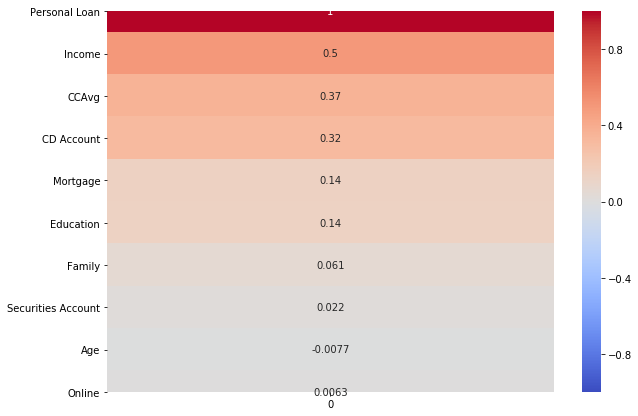

In [15]:
# visualising the above data with heatmap
# we use Pandas corrwith() method that returns a pair-wise correlation

cor = data.corrwith(data['Personal Loan']).iloc[:-1].to_frame()
cor['absolute'] = cor[0].abs()
sorted_cor = cor.sort_values('absolute', ascending=False)[0]
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(sorted_cor.to_frame(), cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax);

Observation: 
   * Income and Credit Card Average are highly related to the target attribute 
   * Mortgage,CD Account,Securities Account,Eduction and Family are moderately related to the target attribute
   * Age attribute has no much of an impact on target feature, so we may as well drop the Age column 

In [16]:
# dropping the Age Attribute 
data.drop(['Age'], axis=1, inplace=True)
data.head()

,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,49,4,1.6,1,0,0,1,0,0,0
1,34,3,1.5,1,0,0,1,0,0,0
2,11,1,1.0,1,0,0,0,0,0,0
3,100,1,2.7,2,0,0,0,0,0,0
4,45,4,1.0,2,0,0,0,0,0,1


## 3) EDA

In [17]:
# calculating number of unique in each column
for col in  data.columns:
    length = len(data[col].unique())
    print("Unique values in "+ str(col) + ":")
    print(length)

Unique values in Income:
162
Unique values in Family:
4
Unique values in CCAvg:
108
Unique values in Education:
3
Unique values in Mortgage:
347
Unique values in Personal Loan:
2
Unique values in Securities Account:
2
Unique values in CD Account:
2
Unique values in Online:
2
Unique values in CreditCard:
2


In [18]:
# calculating number of people with zero mortgage
mg = 0
for i in data['Mortgage']:
    if i is 0:
        mg += 1
print("Total no of people having zero Mortgage :" + str(mg))

Total no of people having zero Mortgage :3462


In [19]:
# step 3 
# Number of people with zero credit card spending per month
cc = 0
for i in data['CreditCard']:
    if i is 0:
        cc += 1
print("Total no of people having zero Credit card spending :" + str(cc))

Total no of people having zero Credit card spending :3530


##### Value counts of all categorical columns

In [20]:
family_count = data['Family'].value_counts(normalize=False).to_frame()
family_count

,Family
1,1472
2,1296
4,1222
3,1010


 * number of customers with only 1 Family member: 1472
 * number of customers with 2 Family members: 1296
 * number of customers with 3 Family members: 1010
 * number of customers with 4 Family members: 1222

In [21]:
edu_count = data['Education'].value_counts(normalize=False).to_frame()
edu_count

,Education
1,2096
3,1501
2,1403


 * number of customers with Education 1 (Undergraduate): 2096
 * number of customers having Education 2 (Graduate): 1403
 * number of customers having Education 3 (Professionals): 1501

In [22]:
sa_count = data['Securities Account'].value_counts(normalize=False).to_frame()
sa_count

,Securities Account
0,4478
1,522


 * 4478 customers dont have Securities Account 
 * 522 customers hold Securities Account

In [23]:
online_count = data['Online'].value_counts(normalize=False).to_frame()
online_count

,Online
1,2984
0,2016


 * 2984 customers have Online Internet Banking facility
 * 2016 customers dont have Online Internet Banking facility

In [24]:
cda_count = data['CD Account'].value_counts(normalize=False).to_frame()
cda_count

,CD Account
0,4698
1,302


 * 4698 customers dont have a certificate of deposit (CD) account with the bank
 * 302 customers have a certificate of deposit (CD) account with the bank

In [25]:
card_count = data['CreditCard'].value_counts(normalize=False).to_frame()
card_count

,CreditCard
0,3530
1,1470


 * 3530 customers dont use the credit card issued by the bank
 * 1470 customers have the credit card from the bank

In [26]:
# The Target Attribute
loan_count = data['Personal Loan'].value_counts(normalize=False).to_frame()
loan_count

,Personal Loan
0,4520
1,480


 * 480 customers out of 5000 had taken a personal loan offered in the last campaign 

In [27]:
# An overview of the above steps with respect to the Target Attribute
df1 = data[['Securities Account','CD Account','Online','CreditCard','Personal Loan']]
df2 = df1.groupby('Personal Loan').sum()
df2

,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,
0,462,162,2693,1327
1,60,140,291,143


#### Checking for Outliers
 * Outliers are those values which are out of the range from other values
 * they deviate our model and reduce the Accuracy of our model
 * so its important to clean them 

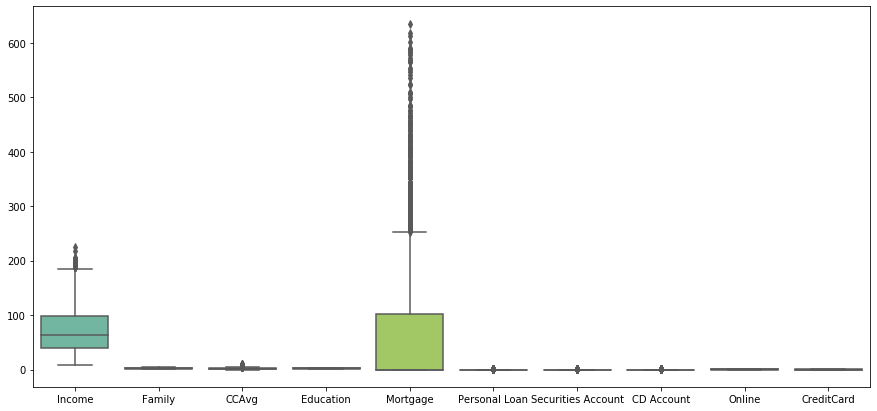

In [28]:
plt.figure(figsize = (15,7))
sns.boxplot(data=data,orient='v',palette='Set2')

  As seen from the above plot
 * Attributes Income and Mortgage have many Outliers
 * Check for the Outliers in the individual attribute for Income and Mortgage                            and eliminate those Outlying data

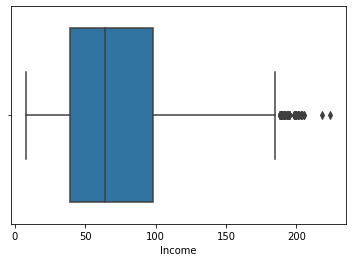

In [29]:
# checking for Outliers in Income Attribute
sns.boxplot(data['Income'])

 There are Outliers above 170, they might deviate our model and reduce the accuracy 
             so better to remove those Outliers 

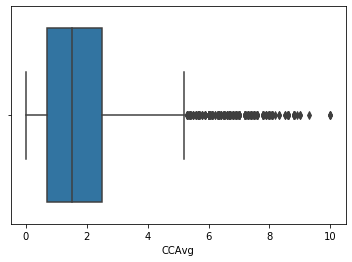

In [30]:
# checking for Outliers in CCAvg feature 
sns.boxplot(data['CCAvg'])

Outliers above 5 can be removed for better Accuracy

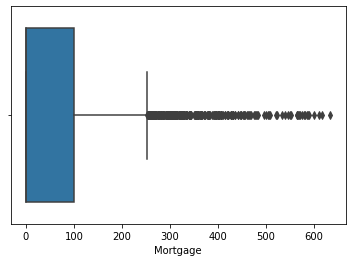

In [31]:
# checking for Outliers in Mortgage Attribute 
sns.boxplot(data['Mortgage'])

Outliers above 250 can be removed for better Accuracy 

##### Dropping the Outliers from the selected attributes 

In [32]:
data = data[data['Income']<170 ]

In [33]:
data = data[data['CCAvg']<5 ]

In [34]:
data = data[data['Mortgage']<250 ]

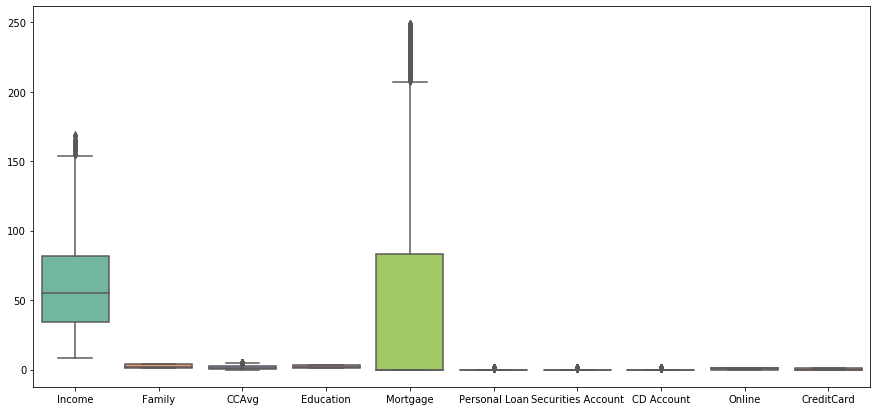

In [35]:
plt.figure(figsize = (15,7))
sns.boxplot(data=data,orient='v',palette='Set2')

Most of the Outliers have been removed for better Accuracy of our Model 

 ##### Univariate Analysis 

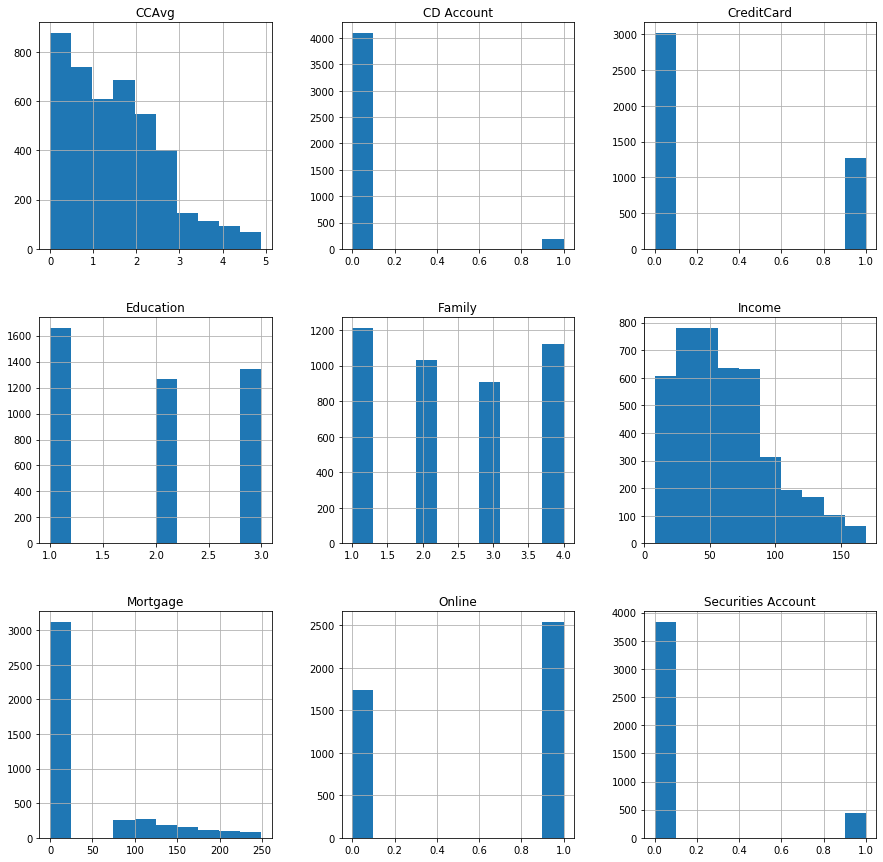

In [36]:
features = ['Income','Family','CCAvg','Education','Mortgage','CD Account',
            'Securities Account','Online','CreditCard']
data[features].hist(figsize=(15, 15));

Observation: 
 * Credit card average data is positively skewed 
 * if we look at the plot of CD Account feature, majority customers dont have CD Account
 * similar observation is recorded from the plots of Securities account and Credit card feature variables
 * The feature varibles Education and Family are ordinal variables and are evenly distributed 
 * Income plot shows that the data is positively skewed 
 * From Mortgage plot we visualise that majority customers have less Mortgage, however it is positively skewed 
 * The plot of Online feature tell's us that majority of the customers have Online Internet Baking facilties, but around 2000 of them have not opted for it

##### Bivariate and Multivariate Analysis

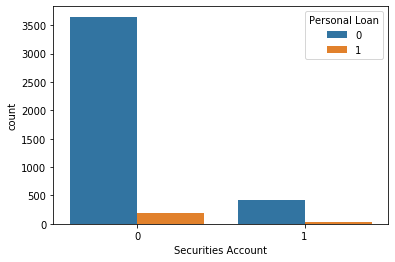

In [37]:
# Relation between Securities account and the target attribute 
sns.countplot(x='Securities Account', data=data, hue='Personal Loan')

Observation: Majority of customers not having Security Account have opted for Personal Loan

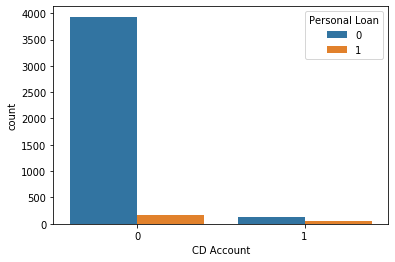

In [38]:
# Relation between CD Account and the Target Attribute 
sns.countplot(x='CD Account',data=data,hue='Personal Loan')

Observation: Majority of customers who have CD Account have Loan as well, 
             

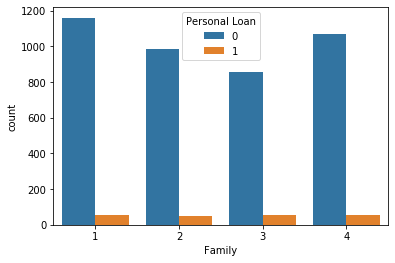

In [39]:
# Relation between Family feature and Personal Loan attribute 
sns.countplot(x='Family',data=data,hue='Personal Loan')

Observation: Family attribute has no much of an impact on a person opting for Personal loan
    We may as well drop it

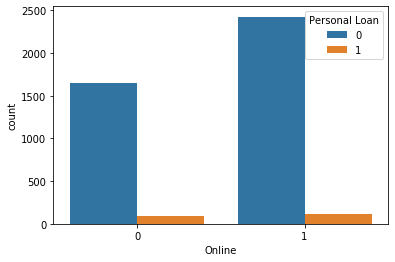

In [40]:
# Realation between the feature attribute Online and the Target Personal Loan
sns.countplot(x='Online',data=data,hue='Personal Loan')

Observation: As seen from the above plot feature attribute Online doesn't have much impact on target 


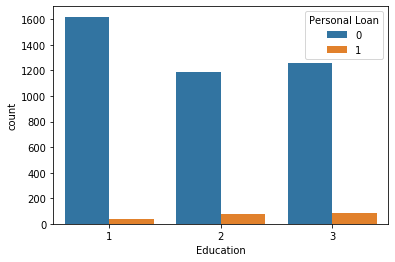

In [41]:
# Relation between Education Attribute and Personal Loan 
sns.countplot(x='Education',data=data,hue='Personal Loan')

Observation: 
   * people having Education level assigned 2 and 3 are much likely to opt for a loan 
   * people with educational level 1 are less likely to take a loan

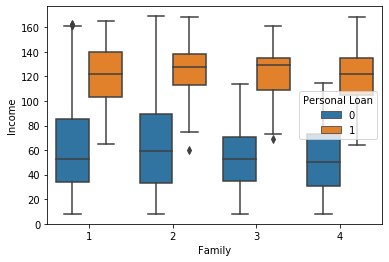

In [42]:
# lets visualise how the relation of Family and Income affect the target attribute
sns.boxplot(x=data['Family'], y=data['Income'], hue=data['Personal Loan'])

Observation: By visualising the above plot
 * Families with income less than 100k are less likely to opt for Personal loan
 * Majority of the Families with higher income have taken Personal loan from the bank

Text(0, 0.5, 'CCAvg')

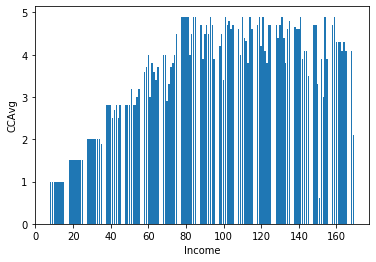

In [43]:
# Lets visualize how Income and credit card average spendings are related 
plt.bar(x=data['Income'], height=data['CCAvg'])
plt.xlabel('Income')
plt.ylabel('CCAvg')

Observation: Higher the income higher is the credit card average spendings

 ##### Lets drop the Family and Online attribute, since they have very less impact on the target attribute 

In [44]:
data.drop(['Family','Online'], axis=1, inplace=True)

In [46]:
# 4) dividing our data into Feature and Target Attributes
x = data[['Income','CCAvg','CD Account','Mortgage','Education',
          'Securities Account','CreditCard']]
x.head()

,Income,CCAvg,CD Account,Mortgage,Education,Securities Account,CreditCard
0,49,1.6,0,0,1,1,0
1,34,1.5,0,0,1,1,0
2,11,1.0,0,0,1,0,0
3,100,2.7,0,0,2,0,0
4,45,1.0,0,0,2,0,1


In [48]:
# Target attribute
y = data[['Personal Loan']]
y.head()

,Personal Loan
0,0
1,0
2,0
3,0
4,0


we have our Feature attributes in X and target attribute in Y


### 5) Splitting the data into training and test set in the ratio 70:30 

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [52]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2994, 7)
(1284, 7)
(2994, 1)
(1284, 1)


In [53]:
#model is scaled to remove any presence of too large data which might bring up an error
from sklearn.preprocessing import Normalizer, StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#Normalizing the data
norm = Normalizer()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### 6) Using the Logistic Regression model to predict the likelihood of a customer buying personal loans

In [54]:
from sklearn.linear_model import LogisticRegression

In [57]:
# fitting Logistic Regression to training set
Logistic = LogisticRegression()
Logistic.fit(x_train,y_train)

C:\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\python\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
# predicting the test set results
y_pred = Logistic.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Cross Validation 


In [60]:
#cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(Logistic, x_train , y_train,cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.95681063 0.98       0.97666667 0.96989967 0.96655518 0.95986622
 0.97324415 0.97658863 0.9632107  0.96655518]


C:\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\python\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\python\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lb

### 7) Printing all the metrics related for evaluating the model performance
#### Determining the Accuracy of our model 

In [61]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [62]:
# getting the accuracy of our Logistic Regression model
lr_accuracy = accuracy_score(y_test,y_pred)
print("The accuracy of the model is {} %".format(lr_accuracy*100))

The accuracy of the model is 96.88473520249221 %


Our Model has an Accuracy of 96.88%

In [63]:
# getting the confusion matrix
lr_cm = confusion_matrix(y_test, y_pred)
print("The confusion matrix for logistic regression is: \n",lr_cm)

The confusion matrix for logistic regression is: 
 [[1223    7]
 [  33   21]]


In [64]:
# getting the classification report for better analysis
lr_report = classification_report(y_test,y_pred)
print("Detailed classification report for logistic regression is: \n",lr_report)

Detailed classification report for logistic regression is: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1230
           1       0.75      0.39      0.51        54

    accuracy                           0.97      1284
   macro avg       0.86      0.69      0.75      1284
weighted avg       0.96      0.97      0.96      1284



 ### 8) Build various other classification algorithms and compare their performance

### Using Decision Tree 

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
# fit your model 
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [67]:
# Model prediction
y_pred_dt = decision_tree.predict(x_test)
y_pred_dt

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [68]:
# get the confusion matrix 
dt_cm = confusion_matrix(y_test,y_pred_dt)
print('The Confusion matrix obtained for Decision Tree Classifier : \n',dt_cm)

The Confusion matrix obtained for Decision Tree Classifier : 
 [[1215   15]
 [  20   34]]


In [69]:
# getting the accuracy of our Decision Tree Classifier model
dt_accuracy = accuracy_score(y_test,y_pred_dt)
print("The accuracy of the model is {} %".format(dt_accuracy*100))

The accuracy of the model is 97.27414330218068 %


Our Decision Tree Classifier model has an accuracy of 97.35%

In [70]:
# getting the classification report for better analysis
dt_report = classification_report(y_test,y_pred_dt)
print("Detailed classification report for our classifier model is: \n",dt_report)

Detailed classification report for our classifier model is: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1230
           1       0.69      0.63      0.66        54

    accuracy                           0.97      1284
   macro avg       0.84      0.81      0.82      1284
weighted avg       0.97      0.97      0.97      1284



### Using Randome Forest 

In [71]:
from sklearn.ensemble import RandomForestClassifier 

In [72]:
# Training our model
random_forest = RandomForestClassifier(n_estimators = 50)
random_forest.fit(x_train,y_train)

C:\python\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [73]:
# Model prediction
y_pred_rf = random_forest.predict(x_test)
y_pred_rf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [74]:
# getting the accuracy of our Decision Tree Classifier model
rf_accuracy = accuracy_score(y_test,y_pred_rf)
print("The accuracy of the model is {} %".format(rf_accuracy*100))

The accuracy of the model is 97.42990654205607 %


The accuracy of our Random Forest Classifier model is 97.42%

In [75]:
# get the confusion matrix 
rf_cm = confusion_matrix(y_test,y_pred_rf)
print('The Confusion matrix obtained for Decision Tree Classifier : \n',rf_cm)

The Confusion matrix obtained for Decision Tree Classifier : 
 [[1219   11]
 [  22   32]]


In [76]:
# getting the classification report for better analysis
rf_report = classification_report(y_test,y_pred_rf)
print("Detailed classification report for our classifier model is: \n",rf_report)

Detailed classification report for our classifier model is: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1230
           1       0.74      0.59      0.66        54

    accuracy                           0.97      1284
   macro avg       0.86      0.79      0.82      1284
weighted avg       0.97      0.97      0.97      1284



### Using Naive Bayes classifier

In [77]:
from sklearn.naive_bayes import GaussianNB

In [78]:
# Training our model
NB_model = GaussianNB()
NB_model.fit(x_train,y_train)

C:\python\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [79]:
# Model prediction
y_pred_nb = NB_model.predict(x_test)
y_pred_nb

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [80]:
# getting the accuracy of our Decision Tree Classifier model
nb_accuracy = accuracy_score(y_test,y_pred_nb)
print("The Accuracy of our model is {} %".format(nb_accuracy*100))

The Accuracy of our model is 93.30218068535827 %


We Achieved an Accuracy of 93.30% using Naive bayes Classifier 

In [81]:
# get the confusion matrix 
nb_cm = confusion_matrix(y_test,y_pred_nb)
print("The Confusion Matrix obtained for Naive Bayes Classifier: \n", nb_cm)

The Confusion Matrix obtained for Naive Bayes Classifier: 
 [[1172   58]
 [  28   26]]


In [82]:
# getting the classification report for better analysis
nb_report = classification_report(y_test,y_pred_nb)
print("Detailed classification report for our classifier model is: \n",nb_report)

Detailed classification report for our classifier model is: 
               precision    recall  f1-score   support

           0       0.98      0.95      0.96      1230
           1       0.31      0.48      0.38        54

    accuracy                           0.93      1284
   macro avg       0.64      0.72      0.67      1284
weighted avg       0.95      0.93      0.94      1284



### Using SVM Classifier 

In [83]:
from sklearn.svm import SVC 

In [84]:
# Training our model
svc = SVC()
svc.fit(x_train,y_train)

C:\python\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [85]:
# Model prediction
y_pred_svc = svc.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [86]:
# check the accuracy of our model
svc_accuracy = accuracy_score(y_test,y_pred_svc)
print('The Accuracy of our model is {} %'.format(svc_accuracy*100))

The Accuracy of our model is 97.50778816199377 %


The Accuray of our SVC model is 97.50%

In [87]:
# get the cnfusion matrix
svc_cm = confusion_matrix(y_test,y_pred_svc)
print("The confusion matrix obtained for SVC is : \n", svc_cm)

The confusion matrix obtained for SVC is : 
 [[1224    6]
 [  26   28]]


In [88]:
# getting the classification report for better analysis
svc_report = classification_report(y_test,y_pred_svc)
print("Detailed classification report for our classifier model is: \n",svc_report)

Detailed classification report for our classifier model is: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1230
           1       0.82      0.52      0.64        54

    accuracy                           0.98      1284
   macro avg       0.90      0.76      0.81      1284
weighted avg       0.97      0.98      0.97      1284



### Using KNN Classifier

In [89]:
from sklearn.neighbors import KNeighborsClassifier

In [90]:
# training our model
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)

C:\python\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [91]:
# Model prediction
y_pred_knn = knn.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [92]:
# get the accuracy of our model
knn_accuracy = accuracy_score(y_test,y_pred_knn)
print("The accuracy of the model is {} %".format(knn_accuracy*100))

The accuracy of the model is 97.0404984423676 %


97% Accuracy was obtained from our KNN Classifier model

In [93]:
# get the confusion matrix 
knn_cm = confusion_matrix(y_test,y_pred_knn)
print("The confusion matrix of our KNN model \n",knn_cm)

The confusion matrix of our KNN model 
 [[1216   14]
 [  24   30]]


In [94]:
# get the detailed report 
knn_report = classification_report(y_test,y_pred_knn)
print("Detailed classification report for our classifier model is: \n",knn_report )

Detailed classification report for our classifier model is: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1230
           1       0.68      0.56      0.61        54

    accuracy                           0.97      1284
   macro avg       0.83      0.77      0.80      1284
weighted avg       0.97      0.97      0.97      1284



### Comparing our Models
 * We used different classification Algorithms for our project, Now we compare each of them for their Accuracy to see which of them have better Accuracy 

In [100]:
comparision= pd.DataFrame({'Classification Algorithm':['Logistic Regression','Decision Tree','Random Forest',
                                                       'Naive-Bayes','SVM','KNN'],
                           'Accuracy(%)':[lr_accuracy*100,dt_accuracy*100,rf_accuracy*100,
                                          nb_accuracy*100,svc_accuracy*100,knn_accuracy*100]})
comparision

,Classification Algorithm,Accuracy(%)
0,Logistic Regression,96.884735
1,Decision Tree,97.274143
2,Random Forest,97.429907
3,Naive-Bayes,93.302181
4,SVM,97.507788
5,KNN,97.040498


#### The above data frame represents a Comparision of different Classification Algorithms used to build our  Machine Learning Model in terms of their Accuracy 
 

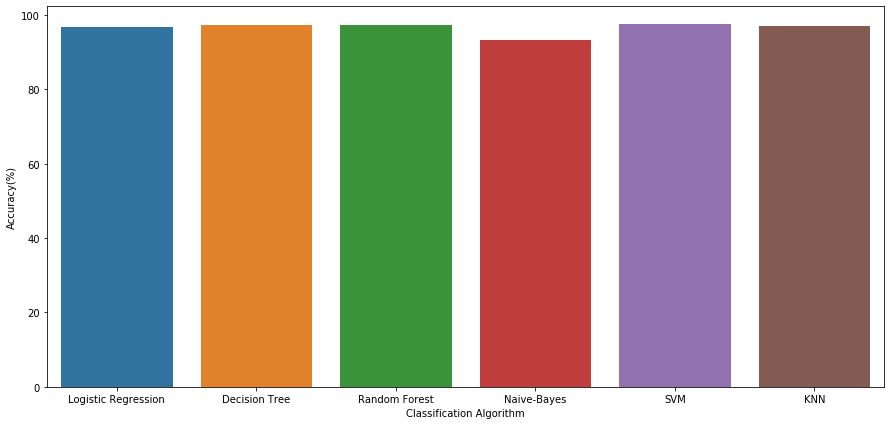

In [106]:
# Visualising the above Comparision 
plt.figure(figsize=(15,7))
sns.barplot(comparision['Classification Algorithm'], comparision['Accuracy(%)'])

### 9) Business understanding of our Model

* The aim of the universal bank is to convert thier liability customers into loan customers 

* They want to set up a new marketing campaign hence, they need information about the relation    between the different attributes given in the data

* We implemented Six different Models with Six different classification algorithms, All of them had Accuracies above 95% 

* From the Model comparison data, it seems like Random Forest Classifier algorithm has the better Accuracy and results were pretty Successful

* Our Model can help the Universal Bank in their objective of predicting the likelihood of their liability customers bying personal Loans